# Ручная настройка графиков

В этой главе мы видили как можно настроить конкретный график, чтобы он выглядел лучше чем по умолчанию. Но можно настроить каждый индивидуальный график отдельно. Например, возьмем следующую диаграмму созданную с настройками по умолчанию:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

%matplotlib inline

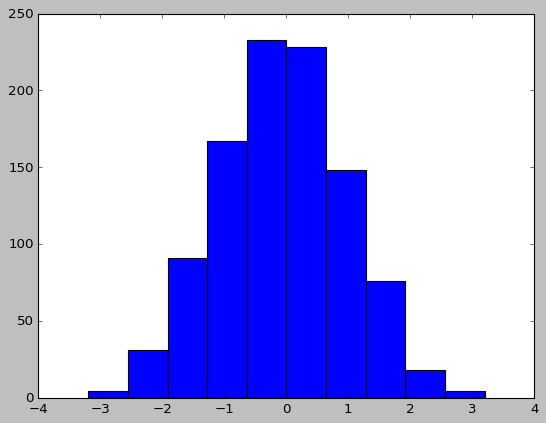

In [2]:
x = np.random.randn(1000)
plt.hist(x);

Мы можем вручную настроить этот график:

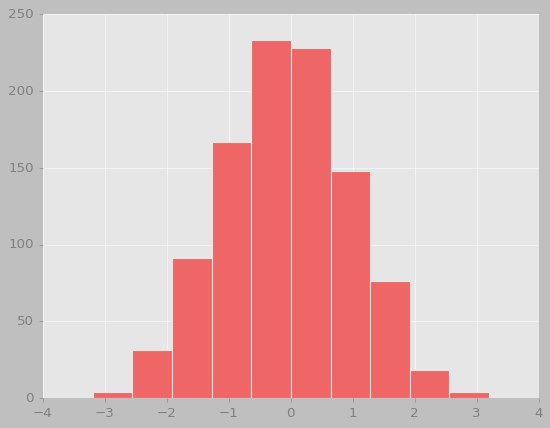

In [5]:
# use a gray background
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

# Изменяем параметры по умолчанию: `rcParams`

Каждый раз когда загружается Matplotlib, он определяет конфигурацию времени исполнения (rc), содержащую стили по умолчанию для каждого элемента графика, который вы создаете. Эта конфигурация может быть изменена в любое время путём использования `plt.rc`. Давайте посмотрим как можно отредактировать `rc` параметры таким образом, что наш график по умолчанию будет похож на тот, который мы создали выше.

Мы начнём с сохранения текущей копии словаря `rcParams`, чтобы мы могли легко вернуть изменения в текущей сессии:

In [6]:
IPython_default = plt.rcParams.copy()

Теперь используем функцию `plt.rc` для изменения некоторых настроек:

In [8]:
from matplotlib import cycler
colors = cycler('color', ['#EE6666', '#3388BB', '#9988DD', '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

Теперь давайте создадим график с диаграммой без задания дополнительных настроек:

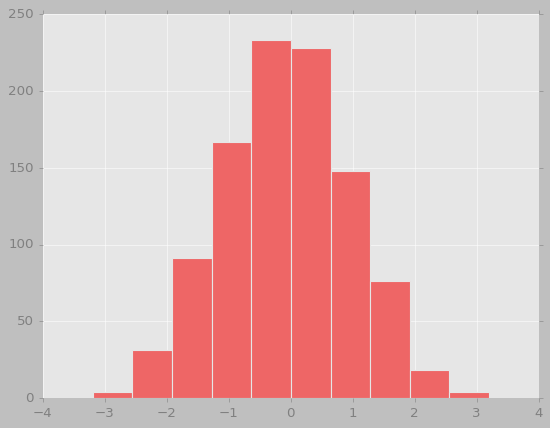

In [9]:
plt.hist(x);

Давайте посмотрим как обыкновенные графики выглядят с нашими настройками:

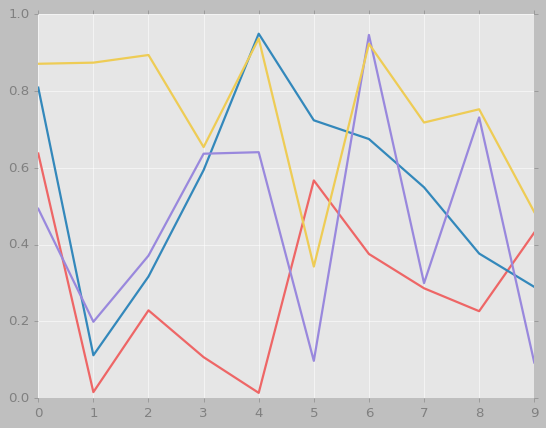

In [10]:
for i in range(4):
    plt.plot(np.random.rand(10))

# Таблицы стилей (stylesheets)

Matplotlib содержит удобный модуль `style`, который содержит набор таблиц стилей, а также предоставляет возможность создать ваши собственные стили. Эти таблицы стилей должны быть сохранены в файл с расширением `.mplstyle`.

Встроенные стили предоставляют очень полезный набор стилей, доступные стили можно посмотреть так:

In [11]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [13]:
# Основной способ изменить стиль:
plt.style.use('fast');

**Такой подход изменяет стиль до конца текущей сессии!**
Если надо установить стиль для текущего графика, то использует контекстный менеджер:

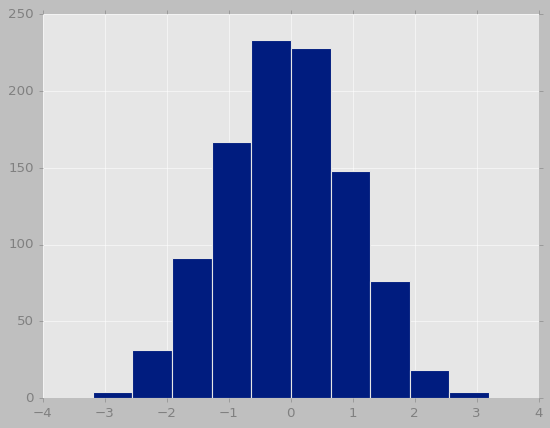

In [20]:
with plt.style.context('seaborn-v0_8-dark-palette'):
    # Создайте график здесь
    plt.hist(x)

Давайте создадим функцию, которая создаёт два основных типа графиков:

In [21]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

## Стиль по умолчанию

Стиль по умолчанию - это то, что мы видели до сих пор в этой книге. Давайте для начала восстановим настройки:

In [22]:
# возврат настроек rcParams
plt.rcParams.update(IPython_default)

Давайте посмотрим как это теперь выглядит:

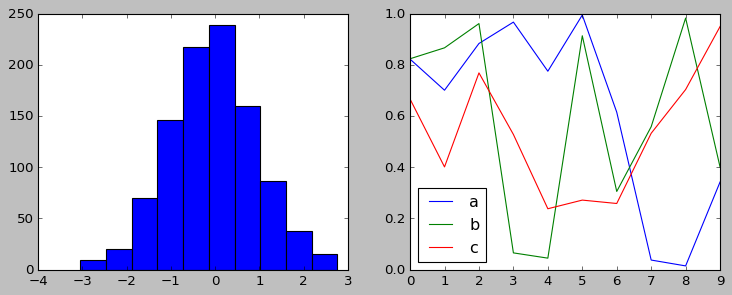

In [23]:
hist_and_lines()

## Стиль FiveThirtyEight

Этот стиль повторяет стиль с известного веб-сайта:

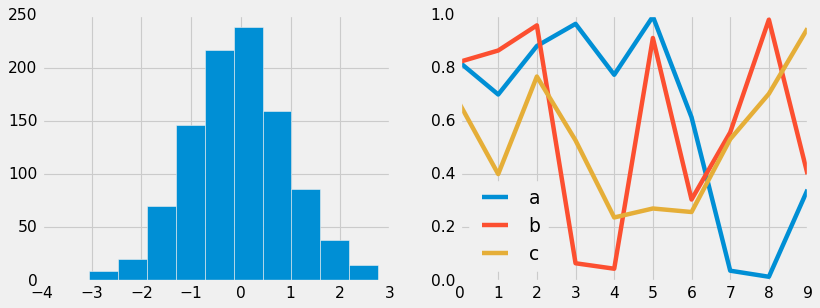

In [25]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

## ggplot

Похож на стиль из языка R:

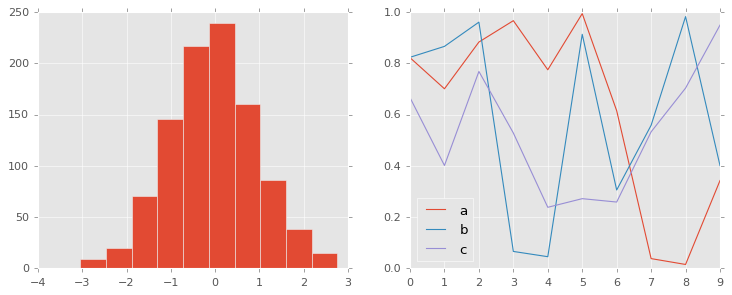

In [26]:
with plt.style.context('ggplot'):
    hist_and_lines()

## Байесовские методы для хакеров

Существует очень хорошая и небольшая [книга](https://dataorigami.net/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/), стиль `bmh` повторяет стиль из той книги:

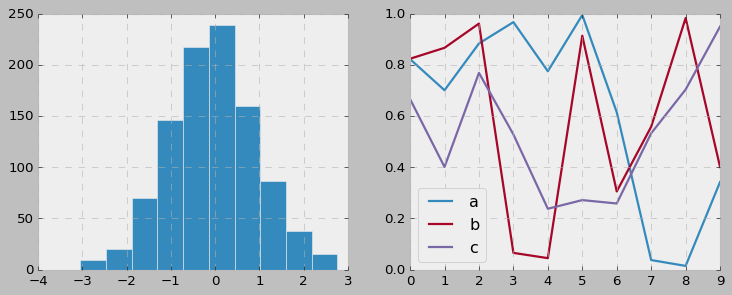

In [27]:
with plt.style.context('bmh'):
    hist_and_lines()

## Темный фон

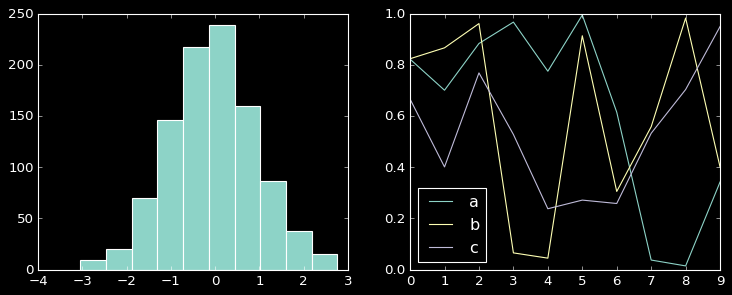

In [28]:
with plt.style.context('dark_background'):
    hist_and_lines()

## Оттенки серого (grayscale)

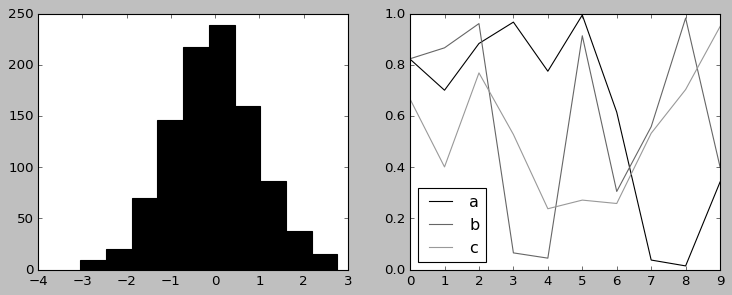

In [30]:
with plt.style.context('grayscale'):
    hist_and_lines()

## Стили Seaborn

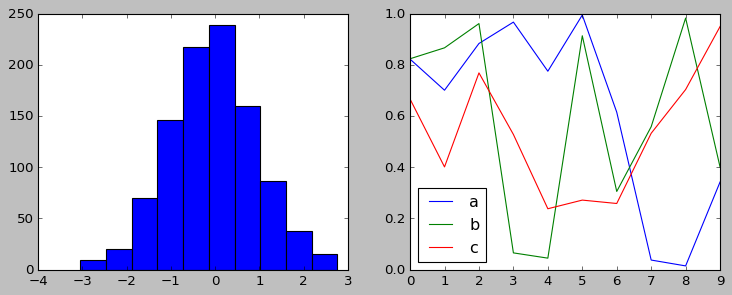

In [31]:
import seaborn
hist_and_lines()